In [8]:
import pandas as pd

data = pd.read_csv('/Users/felix/Github/DataSci/ml/KaggleML/melb_data.csv')

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

In [10]:
# Notice that we don't need to separate training & validation sets 

cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]
y = data.Price

In [13]:
my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))
])

In [22]:
# multiply by -1 as sklearn calculates negative MAE 

scores = -1 * cross_val_score(my_pipeline, X, y,
                             cv=5, 
                             scoring = 'neg_mean_absolute_error')

print(f"MAE scores: \t {scores}")
print(f"Mean score: \t {scores.mean()}")

MAE scores: 	 [301628.7893587  303164.4782723  287298.331666   236061.84754543
 260383.45111427]
Mean score: 	 277707.3795913405


<function matplotlib.pyplot.show>

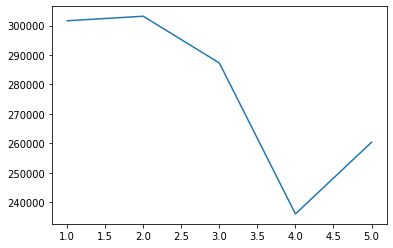

In [25]:
% matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(1,6), list(scores))
plt.show